In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Transformation_2.csv")
df

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,...,v_Width_preceding,v_Class_preceding,v_Vel_preceding,v_Acc_preceding,Lane_ID_preceding,Space_Headway_preceding,Time_Headway_preceding,Vehicle_Class,Space_Gap,Difference_of_speed
0,11,481,864,1113433183000,5.552846,155.754918,6042786.698,2133575.973,5.27304,8.4,...,6.4,2,6.854920,-0.386738,2,8.452104,1.21,Car,13.563600,0.630327
1,11,482,864,1113433183100,5.516880,156.378324,6042786.329,2133578.001,5.27304,8.4,...,6.4,2,6.816288,-0.398156,2,8.616696,1.26,Car,13.639800,0.572765
2,11,483,864,1113433183200,5.486095,157.003892,6042785.978,2133580.024,5.27304,8.4,...,6.4,2,6.776262,-0.415049,2,8.808720,1.33,Car,13.691616,0.508410
3,11,484,864,1113433183300,5.455310,157.632039,6042785.627,2133582.046,5.27304,8.4,...,6.4,2,6.734533,-0.439586,2,9.034272,1.42,Car,13.709904,0.439457
4,11,485,864,1113433183400,5.424221,158.262996,6042785.275,2133584.068,5.27304,8.4,...,6.4,2,6.691019,-0.458415,2,9.278112,1.50,Car,13.703808,0.366951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235379,1749,7307,403,1113438295600,0.952805,440.807041,6042636.225,2134499.912,5.73024,8.0,...,6.4,2,14.872017,-2.206973,1,22.817328,1.45,Car,26.862024,0.672852
235380,1749,7308,403,1113438295700,0.949147,442.227949,6042635.456,2134504.546,5.73024,8.0,...,6.4,2,14.641252,-2.400602,1,22.774656,1.44,Car,27.008328,0.422254
235381,1749,7309,403,1113438295800,0.945490,443.650723,6042634.695,2134509.134,5.73024,8.0,...,6.4,2,14.391028,-2.595519,1,22.765512,1.44,Car,27.166824,0.154545
235382,1749,7310,403,1113438295900,0.941832,445.075004,6042633.934,2134513.722,5.73024,8.0,...,6.4,2,14.121275,-2.790514,1,22.863048,1.45,Car,27.322272,-0.127859


In [3]:
df.columns

Index(['Vehicle_ID', 'Frame_ID', 'Total_Frames', 'Global_Time', 'Local_X',
       'Local_Y', 'Global_X', 'Global_Y', 'v_Length', 'v_Width', 'v_Class',
       'v_Vel', 'v_Acc', 'Lane_ID', 'Preceding', 'Following', 'Space_Headway',
       'Time_Headway', 'Location', 'Period', 'Vehicle_ID_preceding',
       'Global_Time_preceding', 'v_Length_preceding', 'v_Width_preceding',
       'v_Class_preceding', 'v_Vel_preceding', 'v_Acc_preceding',
       'Lane_ID_preceding', 'Space_Headway_preceding',
       'Time_Headway_preceding', 'Vehicle_Class', 'Space_Gap',
       'Difference_of_speed'],
      dtype='object')

In [4]:
#X = df[['v_Class','v_Class_preceding', 'v_Vel_preceding', 'v_Acc_preceding','Space_Gap','Difference_of_speed']]
X = df.drop(['v_Acc','Vehicle_Class','Location' , 'Period'], axis=1)
y =  df['v_Acc']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

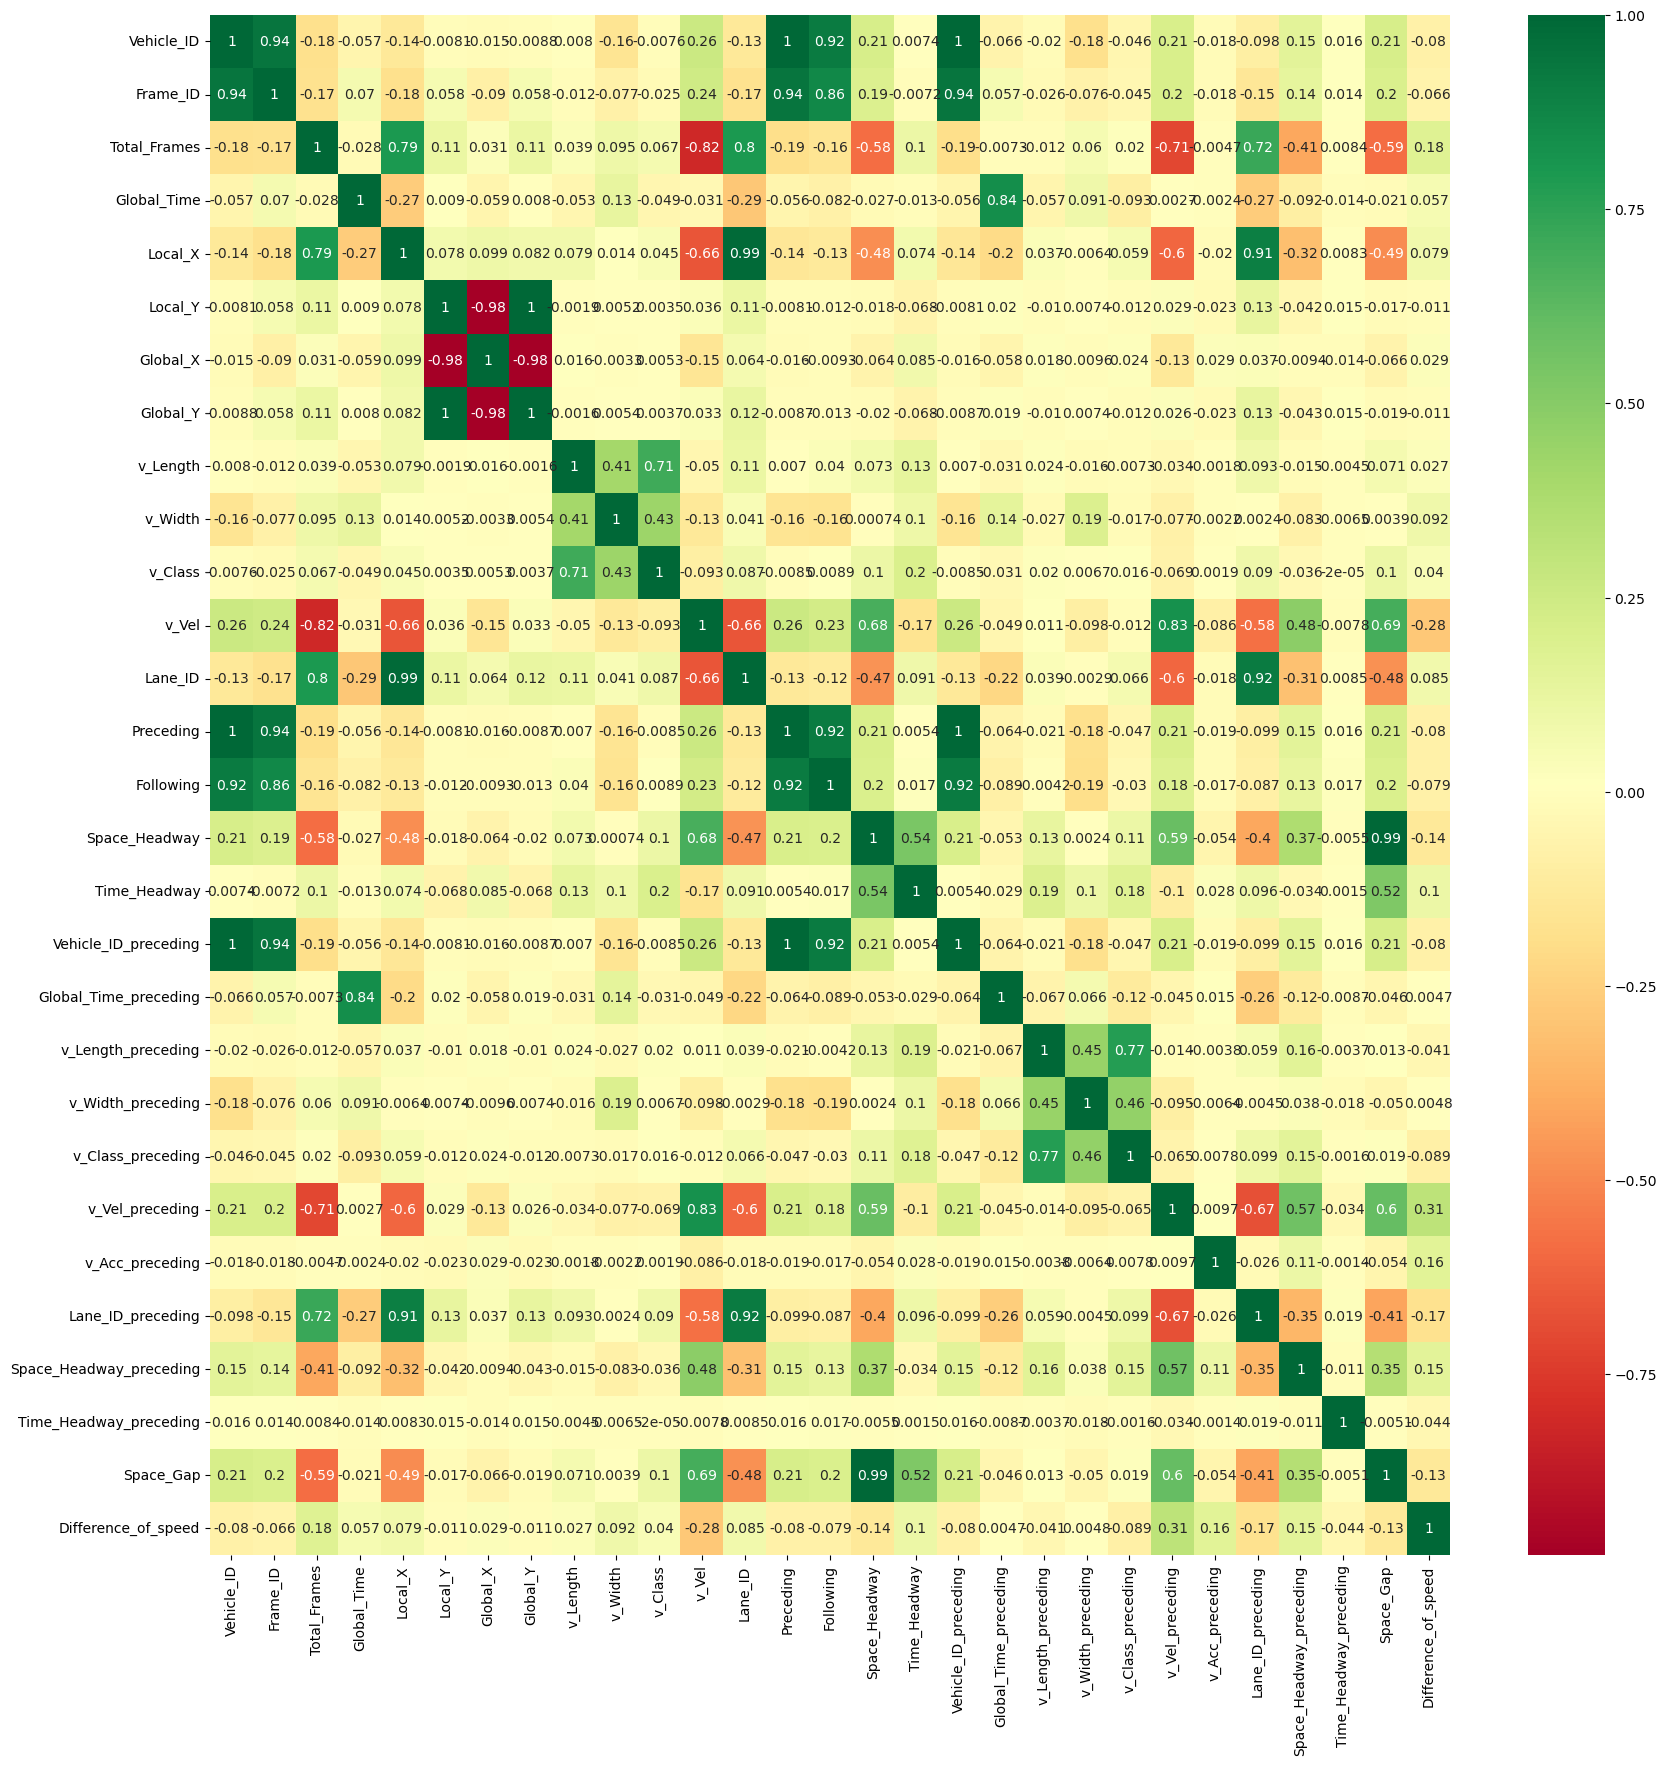

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 
corr_df =X.corr()
top_corr_feature = corr_df.index

plt.figure(figsize = (20,20))

plot = sns.heatmap(X[top_corr_feature].corr() , annot = True ,  cmap = "RdYlGn" )



In [7]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor()

rf.fit(X_train, y_train)


RandomForestRegressor()

In [8]:
rf.score(X_test,y_test)

0.9267332001655095

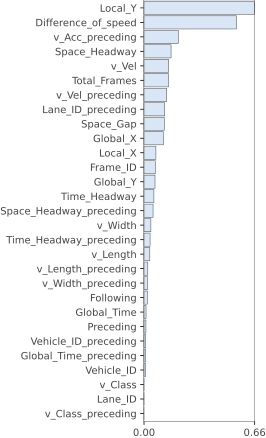

In [9]:
from rfpimp import *
I = importances(rf, X_test, y_test, list(X_test.columns))
plot_importances(I)

In [10]:
X = df.drop(['v_Acc','Vehicle_Class','Location' , 'Period', 'v_Class_preceding','v_Class', 'Lane_ID', 'Global_Time_preceding', 'Vehicle_ID', 'Vehicle_ID_preceding', 'Preceding', 'Global_Time'], axis=1)
y =  df['v_Acc']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
rf.score(X_test,y_test)

0.926943927572942

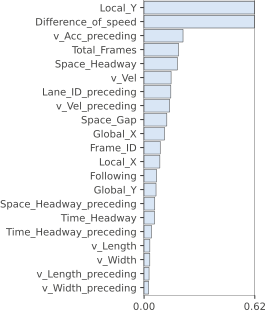

In [14]:
from rfpimp import *
I = importances(rf, X_test, y_test, list(X_test.columns))
plot_importances(I)

In [15]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
params = {
 'learning_rate' : [0.05,0.10,0.01],
 'max_depth' : [ 8, 10],
 'min_child_weight' : [ 1, 3],
 'gamma': [ 0.0, 0.1, 0.2 ],
 'colsample_bytree' : [ 0.3, 0.5 , 0.7 ],
 'subsample' : [ 0.5, 1],
 'reg_alpha' : [0.1, 0.5, 1],
 'reg_lambda' : [0.1, 0.5, 1]
}
rs_model=RandomizedSearchCV(xgb.XGBRegressor(),param_distributions=params,scoring='r2',n_jobs=-1,cv=3,verbose=3,n_iter=100)

In [16]:
rs_model.fit(X_train, y_train)
print (rs_model.best_score_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
0.7962245073440499


In [17]:
xg1= rs_model.best_estimator_
print (xg1.score(X_test,y_test))

0.8114249306235082
